# Unemployment in India Project
#### The goal of this project is to know how lock-down affects employment opportunities
#### and how the unemployment rate increases during the Covid-19.

In [1]:
# wrangling the data using this libraries
import pandas as pd
import numpy as np

In [2]:
# To visualise the data I use this libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression

In [3]:
# Loading the data
data = pd.read_csv('Unemployment in India.csv')

In [5]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
# checking the datatypes of each column and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [13]:
# checking the missing value in the data
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [15]:
# Removing the missing value in the data
data.dropna(inplace=True)

In [16]:
# Checking for the missing value again
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [17]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
# converting columns to integer

data = data[data[' Estimated Employed'] != ' ']
data.reset_index(drop = True, inplace = True)

data = data.astype({
    ' Estimated Employed': 'int'
})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int32  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 37.7+ KB


# 1. How Covid-19 affects the employment

In [19]:
# Convert date colunm to datetime format

data[' Date'] = pd.to_datetime(data[' Date'])

In [20]:
# I am Filtering the data for covid-19 period 

covid_period = data[data[' Date'] >= '2020-03-01']

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


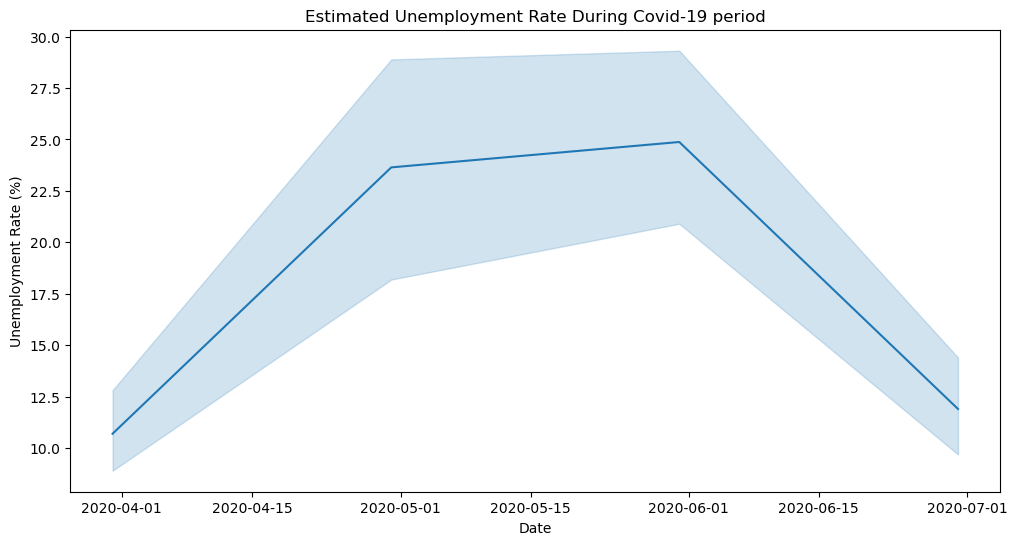

In [21]:
# Ploting to estimate unemployment rate over time

plt.figure(figsize=(12,6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)',
             data=covid_period)
plt.title('Estimated Unemployment Rate During Covid-19 period')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [27]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural


In [23]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

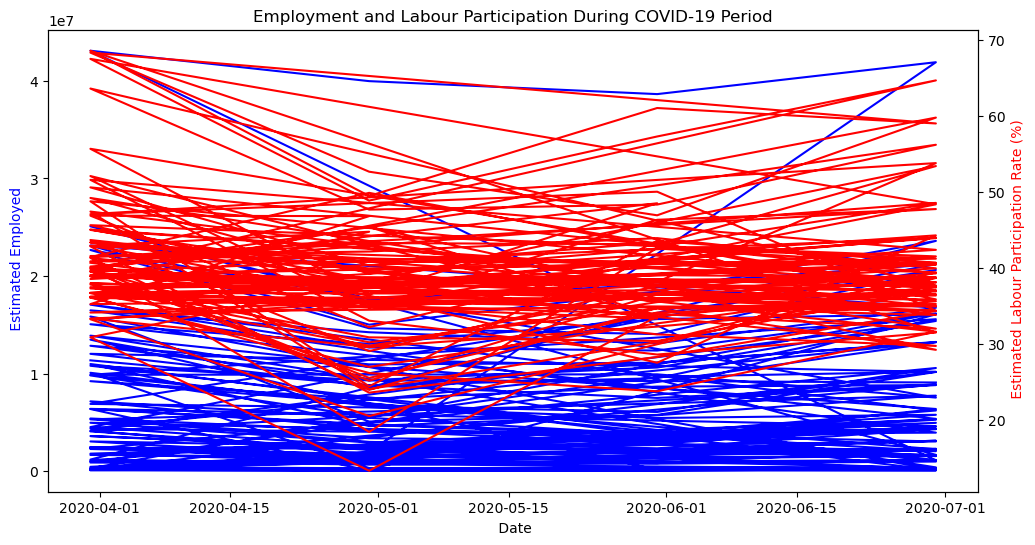

In [22]:
# Ploting to estimate and show the estimated employed and labour participation rate over time

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(covid_period[' Date'], covid_period[' Estimated Employed'],
        color='blue')
ax1.set_xlabel(' Date')
ax1.set_ylabel(' Estimated Employed', color='blue')
ax2 =ax1.twinx()
ax2.plot(covid_period[' Date'],
        covid_period[' Estimated Labour Participation Rate (%)'],
        color='red')
ax2.set_ylabel(' Estimated Labour Participation Rate (%)', color='red')
plt.title('Employment and Labour Participation During COVID-19 Period')
plt.show()

In [28]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural


In [29]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [23]:
# inspecting the categorical columns

data['Region'].unique()
data['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

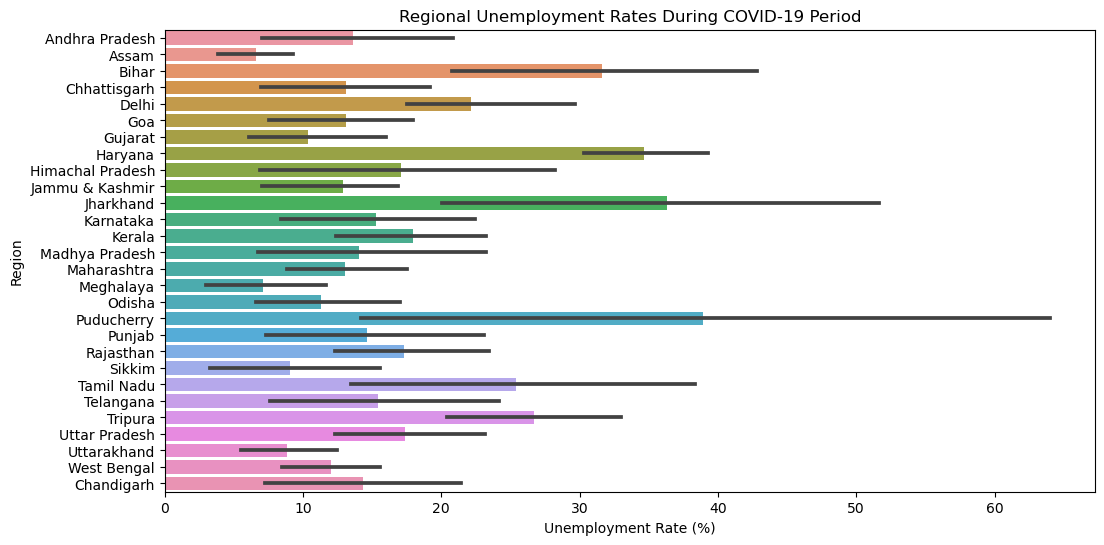

In [24]:
# Ploting to estimate the regional unemployment rates

plt.figure(figsize=(12,6))
sns.barplot(y='Region', x=' Estimated Unemployment Rate (%)',
           data=covid_period)
plt.title('Regional Unemployment Rates During COVID-19 Period')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()

In [34]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


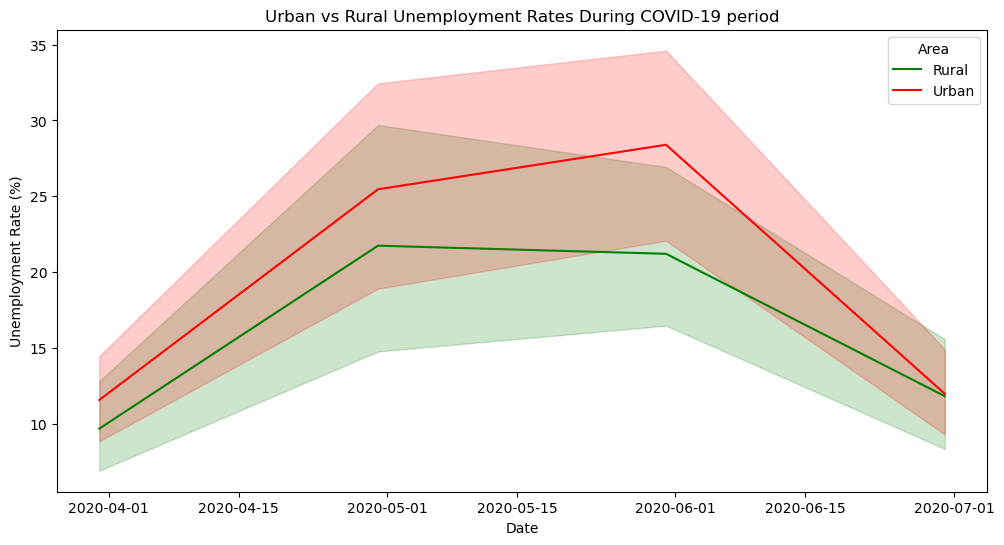

In [25]:
# Ploting to see Urban vs Rural unemployment rates over time

plt.figure(figsize=(12,6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', hue='Area',
            data=covid_period, palette=['green', 'red'])
plt.title('Urban vs Rural Unemployment Rates During COVID-19 period')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area', loc='upper right')
plt.show()

# 2. How far the unemployment rate will go?

In [26]:
# Defining the feature (date) and target (Unemployment rate) variables

x = np.array(covid_period[' Date']).reshape(-1,1)
y = np.array(covid_period[' Estimated Unemployment Rate (%)']).reshape(-1,1)


In [27]:
# Creating a linear regression model

model = LinearRegression()

In [28]:
# Fitting the model to the data

model.fit(x, y)

LinearRegression()

In [41]:
# Predicting the Unemployment rate for the next 6 months

future_dates = np.array([pd.to_datetime('today') + pd.Timedelta(days=x)
         for x in range(30, 180, 30)]).reshape(-1, 1)
future_dates_dt = pd.to_datetime(future_dates.ravel())

In [43]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

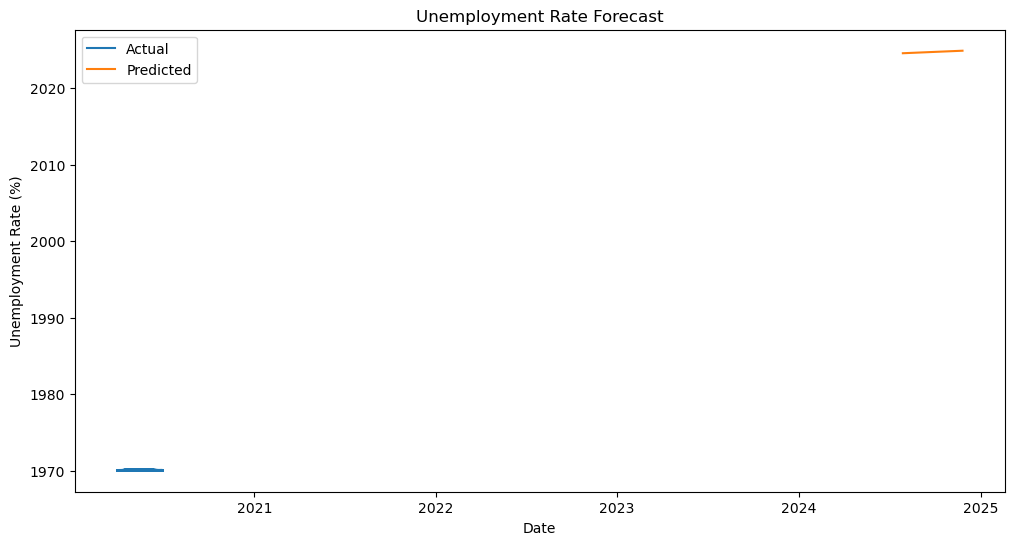

In [60]:
# Ploting the predicted unemployment rate

plt.figure(figsize=(12,6))
plt.plot(covid_period[' Date'], covid_period[' Estimated Unemployment Rate (%)'],
        label='Actual')
plt.plot(future_dates, future_dates_dt, label='Predicted', linestyle='solid')
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

# Conclusion:

* The analysis of the employment dataset reveals the significant impact of the COVID-19 pandemic on employment rates, labor participation, and unemployment rates across different regions and areas.
* The results show a significant increase in unemployment rates, particularly in urban areas, and a decline in labor participation rates. The estimated employed numbers also show a significant decrease during the pandemic period.


# Recommendation:

Based on the analysis, we recommend the following:

1. Regional targeted interventions: Implement region-specific policies to address the disparities in unemployment rates and labor participation rates.
2. Urban area focus: Concentrate efforts on urban areas, which have been disproportionately affected by the pandemic.
3. Job creation initiatives: Encourage job creation programs to address the decline in employed numbers.
4. Labor market support: Provide support for labor market participants, such as training and upskilling programs, to enhance employability.
5. Monitoring and evaluation: Continuously monitor and evaluate the employment situation to adjust policies and programs accordingly.
